## Figure 3: Compare Cellpose and MicroSAM variants on a single image

Run three segmenters on the same image and show the original (top) and overlays (bottom):
- CellposeSegmenter
- MicroSamSegmenter
- MicroSamYoloSegmenter (if available, otherwise a MicroSam fallback)

Image: `data/addhopin blood cells/subset/BloodImage_00160_jpg.rf.894e8c8c7179ec9958a4d6c7b6b45616.jpg`

In [1]:
import os
from pathlib import Path
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from tnia.plotting.plt_helper import mask_overlay

# Import segmenter wrappers directly (let errors surface if unavailable)
from napari_ai_lab.Segmenters.GlobalSegmenters import CellposeSegmenter, MicroSamSegmenter, MicroSamYoloSegmenter

# Path to the single image to analyze (relative to this notebook)
image_path = Path('../../reproducible-dl-seg-article/data/addhopin blood cells/subset/BloodImage_00160_jpg.rf.894e8c8c7179ec9958a4d6c7b6b45616.jpg')
print('Image:', image_path)
img = io.imread(str(image_path))
# Ensure RGB
if img.ndim == 2:
    img = np.expand_dims(img, axis=2)
    img = np.repeat(img, 3, axis=2)
print('Loaded image shape:', img.shape)

# Helper: short name for plotting titles
import os as _os
def short_name(p):
    base = _os.path.basename(str(p))
    idx = base.lower().find('jpg')
    return base[:idx+3] if idx != -1 else base

# Holders for results
segmenter_names = []
masks = []
overlays = []

# Cellpose
cps = CellposeSegmenter(model_type='cyto2', diameter=None)
print('Created CellposeSegmenter')
seg_cp = cps.segment(img)
segmenter_names.append('CellposeSegmenter')
masks.append(seg_cp)
overlays.append(mask_overlay(img, seg_cp))

# MicroSAM
ms = MicroSamSegmenter()
print('Created MicroSamSegmenter')
seg_ms = ms.segment(img)
segmenter_names.append('MicroSamSegmenter')
masks.append(seg_ms)
overlays.append(mask_overlay(img, seg_ms))

# MicroSAM-YOLO
my = MicroSamYoloSegmenter(conf=0.1, imgsz=1024, max_area=40000)
print('Created MicroSamYoloSegmenter')
seg_my = my.segment(img)
segmenter_names.append('MicroSamYoloSegmenter')
masks.append(seg_my)
overlays.append(mask_overlay(img, seg_my))

/home/bnorthan/code/i2k/tnia/reproducible-dl-seg-article/pixi/microsam_cellposesam/.pixi/envs/default/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bnorthan/code/i2k/tnia/reproducible-dl-seg-article/pixi/microsam_cellposesam/.pixi/envs/default/lib/python3.11/site-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/home/bnorthan/code/i2k/tnia/reproducible-dl-seg-article/pixi/microsam_cellposesam/.pixi/envs/default/lib/python3.11/site-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} 

Image: ../../reproducible-dl-seg-article/data/addhopin blood cells/subset/BloodImage_00160_jpg.rf.894e8c8c7179ec9958a4d6c7b6b45616.jpg
Loaded image shape: (416, 416, 3)
Created CellposeSegmenter
Created MicroSamSegmenter
MicroSam: Using device: cuda
MicroSam: Using non-tiled segmentation
MicroSam: Loading model type: vit_b_lm
Created MicroSamSegmenter
MicroSam: Using device: cuda
MicroSam: Using non-tiled segmentation
MicroSam: Loading model type: vit_b_lm
MicroSam: Running segmentation (ndim=2)...
MicroSam: Running segmentation (ndim=2)...


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]



MicroSam: Found 1 instances
Created MicroSamYoloSegmenter
Predicting bounding boxes for image data
Predicting bounding boxes for image data



0: 1024x1024 24 objects, 72.1ms
Speed: 4.1ms preprocess, 72.1ms inference, 17.8ms postprocess per image at shape (1, 3, 1024, 1024)
0: 1024x1024 24 objects, 72.1ms
Speed: 4.1ms preprocess, 72.1ms inference, 17.8ms postprocess per image at shape (1, 3, 1024, 1024)

Compute Image Embeddings 2D: 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]



In [8]:
from napari_ai_lab.Segmenters.execute_appose import execute_appose

pixi_path = r"../pixi"
cellpose_env_path = os.path.join(pixi_path, r"microsam_cellpose3/.pixi/envs/default")

cps.diameter = 30

result = execute_appose(img, cps, cellpose_env_path)

seg_cp3 = result.ndarray().copy()

dict_keys(['mask'])


In [9]:
cps.diameter = 100

result = execute_appose(img, cps, cellpose_env_path)

seg_cp3_d100 = result.ndarray().copy()

dict_keys(['mask'])


In [10]:
type(seg_cp3)
overlays.append(mask_overlay(img, seg_cp3))

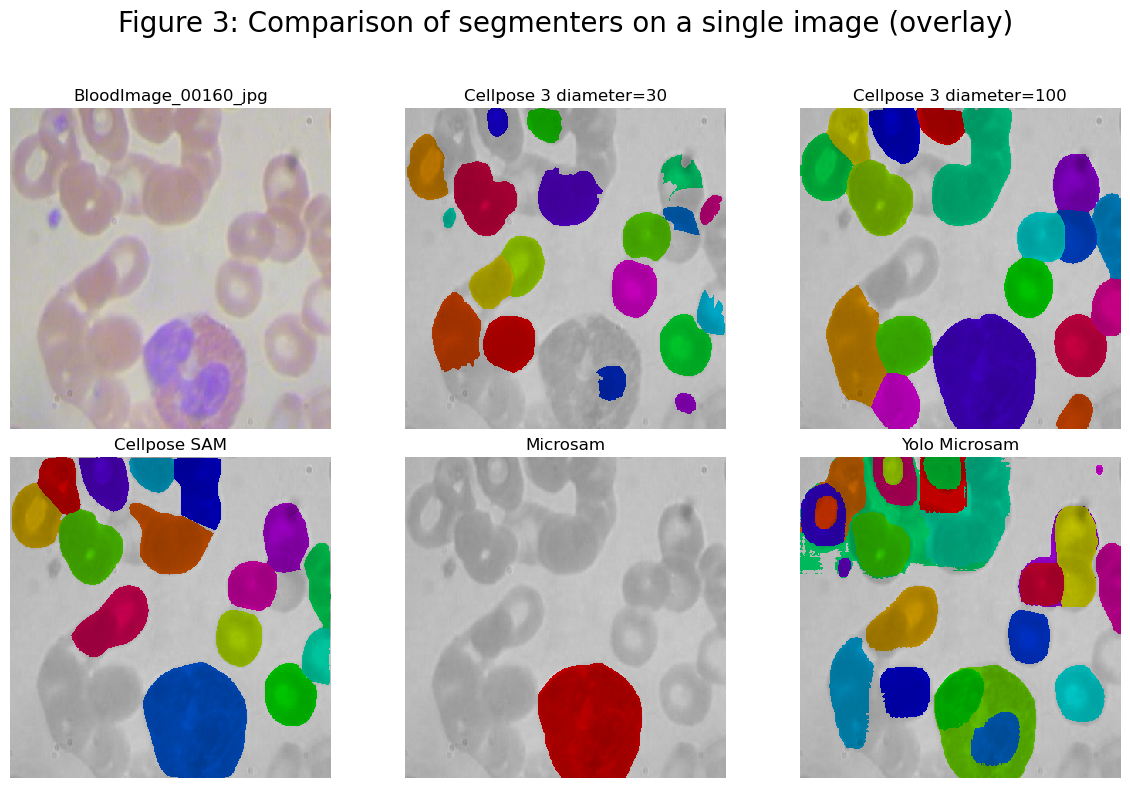

In [12]:
n = len(overlays)
fig, axes = plt.subplots(2, 3, figsize=(4*3, 8))

axes[0, 0].imshow(img)
axes[0, 0].set_title(short_name(image_path))
axes[0, 0].axis('off')

axes[0, 1].imshow(mask_overlay(img, seg_cp3))
axes[0, 1].set_title(short_name('Cellpose 3 diameter=30'))
axes[0, 1].axis('off')

axes[0, 2].imshow(mask_overlay(img, seg_cp3_d100))
axes[0, 2].set_title(short_name('Cellpose 3 diameter=100'))
axes[0, 2].axis('off')

axes[1, 0].imshow(mask_overlay(img, seg_cp))
axes[1, 0].set_title(short_name('Cellpose SAM'))
axes[1, 0].axis('off')

axes[1, 1].imshow(mask_overlay(img, seg_ms))
axes[1, 1].set_title(short_name('Microsam'))
axes[1, 1].axis('off')

axes[1, 2].imshow(mask_overlay(img, seg_my))
axes[1, 2].set_title(short_name('Yolo Microsam'))
axes[1, 2].axis('off')

plt.suptitle('Figure 3: Comparison of segmenters on a single image (overlay)', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Figure 3 caption
Comparison of three segmentation approaches applied to the same sample from the addhopin blood cells subset. Top row: original RGB image. Bottom row (left-to-right): Cellpose predicted instance overlay, MicroSAM predicted instance overlay, and MicroSAM-YOLO (or fallback) predicted instance overlay. All methods were run with their default parameters; colors indicate distinct instances in the overlays. If a wrapper is unavailable in the running environment, a placeholder was used and the cell prints a note explaining the fallback.

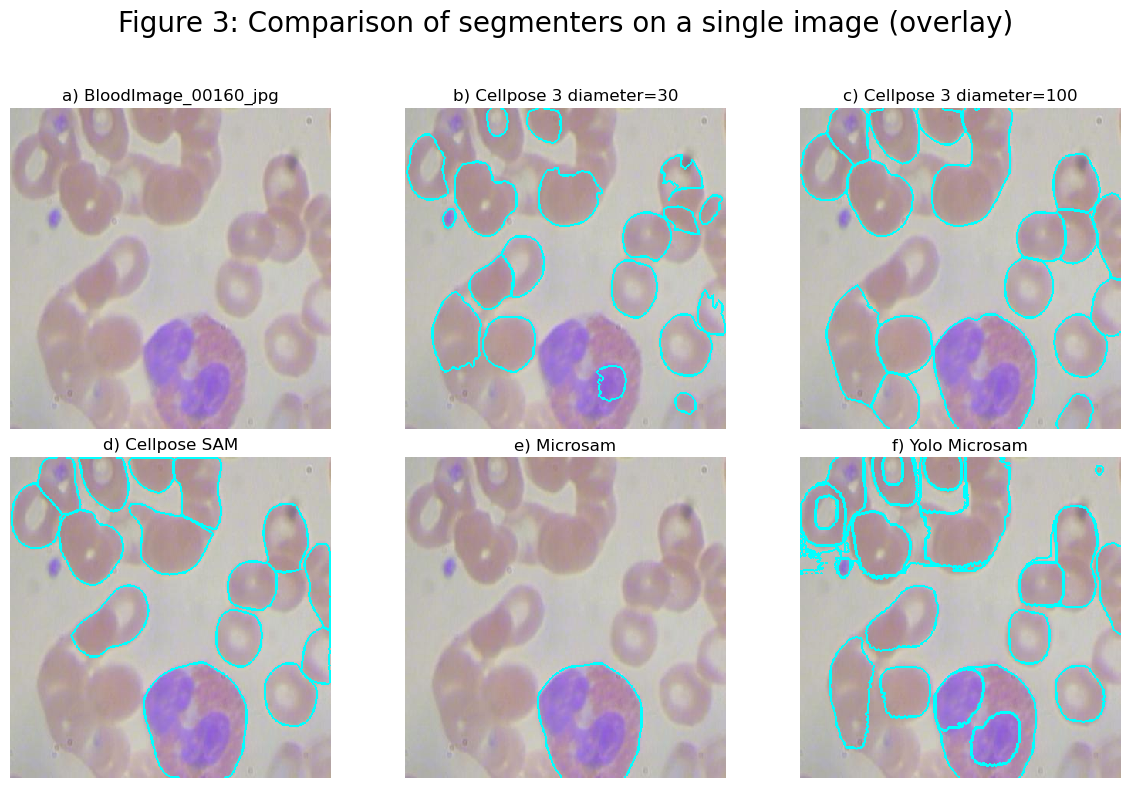

In [15]:
from tnia.plotting.plt_helper import mask_outline_overlay
fig, axes = plt.subplots(2, 3, figsize=(4*3, 8))

axes[0, 0].imshow(img)
axes[0, 0].set_title(f'a) {short_name(image_path)}')
axes[0, 0].axis('off')

axes[0, 1].imshow(mask_outline_overlay(img, seg_cp3))
axes[0, 1].set_title(f'b) {short_name("Cellpose 3 diameter=30")}')
axes[0, 1].axis('off')

axes[0, 2].imshow(mask_outline_overlay(img, seg_cp3_d100))
axes[0, 2].set_title(f'c) {short_name("Cellpose 3 diameter=100")}')
axes[0, 2].axis('off')

axes[1, 0].imshow(mask_outline_overlay(img, seg_cp))
axes[1, 0].set_title(f'd) {short_name("Cellpose SAM")}')
axes[1, 0].axis('off')

axes[1, 1].imshow(mask_outline_overlay(img, seg_ms))
axes[1, 1].set_title(f'e) {short_name("Microsam")}')
axes[1, 1].axis('off')

axes[1, 2].imshow(mask_outline_overlay(img, seg_my))
axes[1, 2].set_title(f'f) {short_name("Yolo Microsam")}')
axes[1, 2].axis('off')

plt.suptitle('Figure 3: Comparison of segmenters on a single image (overlay)', fontsize=20, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Figure 3 Description

**Figure 3: Comparison of segmentation methods on blood cell images.** 
Figure 3 a) shows the original RGB image from the addhopin blood cells dataset. Figure 3 b) and c) compare Cellpose 3.0 segmentation results with different diameter settings: b) diameter=30 pixels and c) diameter=100 pixels, demonstrating the effect of this critical parameter on cell boundary detection. Figure 3 d) shows results from Cellpose-SAM, which uses the pretrained backbone of the foundation model SAM and adapts it to the Cellpose flow-based framework. Figure 3 e) displays MicroSAM segmentation, an adaptation of the Segment Anything Model for microscopy images. Figure 3 f) presents MicroSAM-YOLO results, which integrates YOLO object detection with MicroSAM segmentation for improved cell localization. All overlays use cyan outlines to delineate detected cell boundaries, allowing direct visual comparison of segmentation accuracy and completeness across methods. The comparison demonstrates that different segmentation approaches produce notably different segmentations, highlighting the lack of reproducibility between methods even when applied to the same image.